In [ ]:
# a reminder 30 fps is 33 ms per frame
# 15 fps is 66 ms per frame
# 10 fps is 100 ms per frame 
# lets make the full frame rate be 10 frames per second and sync to the nearest 10th of a second
# let's look at diffrent ways of getting the most accrate time stamp from a live capture

# there are two options that come to mind
# set the frame buffer to 1 
# every 100ms on the 100ms read a frame from the capture 
#  - this appears to take .2 - 30 ms about <- probably the short ones are buffered
# assume the frame read started from the time that cap.read happened


#jk this other way is not for live video but for prerecorded ones, the cap props are all not helpful
# capture a frame
# set the frame buffer to 1 for consistencey on the one as well
# check the CAP_PROP_POS_MSEC and subtract it from the time just betore cap.read to get the cap start time
# whis would in theory give the actual time that the frame was taken
# we can compare the the diffrence in the datetime now timestamp taken before sucessive cap.reads
# to the difference in CAP_PROP_POS_MSEC of successive frames


In [1]:
import cv2
from datetime import datetime

# Initialize the webcam (0 is the default camera)
timeBeforeCapDefined = datetime.now() 
cap = cv2.VideoCapture(0)
timeAfterCapDefined = datetime.now() 

cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [2]:
import pandas as pd
columns = ['preReadTime', 'postReadTime', 'CAP_PROP_POS_MSEC', 'CAP_PROP_POS_FRAMES']
metaDf = pd.DataFrame(columns=columns)

In [18]:
# this cell will just log at the full frame rate and we can analyze later
frameCount = 0
while frameCount < 1000:
    rowToAdd = {}
    rowToAdd['preReadTime'] = datetime.now()
    ret, frame = cap.read()
    rowToAdd['postReadTime'] = datetime.now() 
    rowToAdd['CAP_PROP_POS_MSEC'] = cap.get(cv2.CAP_PROP_POS_MSEC)
    rowToAdd['CAP_PROP_POS_FRAMES'] = cap.get(cv2.CAP_PROP_POS_FRAMES)
    metaDf.loc[len(metaDf)] = rowToAdd
    frameCount += 1

/tmp/ipykernel_70468/3691588170.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metaDf.loc[len(metaDf)] = rowToAdd
/tmp/ipykernel_70468/3691588170.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metaDf.loc[len(metaDf)] = rowToAdd
/tmp/ipykernel_70468/3691588170.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the

KeyboardInterrupt: 

In [4]:
print(len(metaDf)) # about 16 fps?

500


In [7]:
metaDf['readTime'] = metaDf['postReadTime'] - metaDf['preReadTime']

In [9]:
metaDf['readTime'].describe()

count                          500
mean     0 days 00:00:00.057891364
std      0 days 00:00:00.045022443
min         0 days 00:00:00.027625
25%      0 days 00:00:00.035068750
50%         0 days 00:00:00.061742
75%         0 days 00:00:00.062961
max         0 days 00:00:00.960190
Name: readTime, dtype: object

In [14]:
metaDf['readTime'].astype(int).describe()

count    5.000000e+02
mean     5.789136e+07
std      4.502244e+07
min      2.762500e+07
25%      3.506875e+07
50%      6.174200e+07
75%      6.296100e+07
max      9.601900e+08
Name: readTime, dtype: float64

<Axes: ylabel='Frequency'>

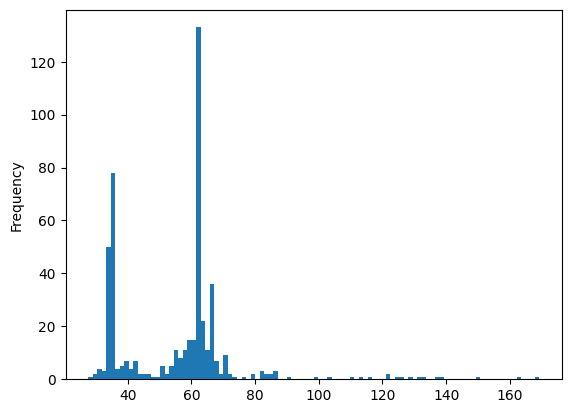

In [17]:
(metaDf['readTime'].astype(int)/1000000).iloc[1:].plot.hist(bins=100)

In [15]:
metaDf['readTime'].iloc[1:]


1     0 days 00:00:00.059347
2     0 days 00:00:00.054284
3     0 days 00:00:00.039023
4     0 days 00:00:00.066925
5     0 days 00:00:00.065995
               ...          
495   0 days 00:00:00.061725
496   0 days 00:00:00.034445
497   0 days 00:00:00.062278
498   0 days 00:00:00.030153
499   0 days 00:00:00.085538
Name: readTime, Length: 499, dtype: timedelta64[ns]